# Predicting Vehicle Prices Using Regression Models

## **Objectives**  
The primary goal of this project is to develop a robust regression model to predict used car prices for a reseller based on various listed features and specifications. In addition to predicting prices, the project focuses on identifying feature importance and mitigating overfitting through the application of regularisation techniques.

There can be several business objectives for this, such as:

* **Price Prediction**: Model car prices based on features like mileage, fuel type, and performance.
* **Market Analysis**: Explore trends and preferences in the used car market, by type, region, or other metrics.
* **Feature Importance**: Identify the most important factors influencing car prices (e.g., fuel type, mileage, age).

### **Tasks Overview**
The data pipeline for this task involves the following steps:  
1. **Dataset Overview**   
2. **Data Preprocessing**
3. **Data Visualisation & Exploration**
4. **Model Building**
3. **Regularisation**

## **1 Data Understanding**

| **Variable** | **Description** |
--------|--------------|
| `make_model` | The brand and model of the vehicle (e.g., 'Audi A1'). |
| `body_type` | The body style of the vehicle, such as Sedan, Compact, or Station Wagon. |
| `price`  | The listed price of the car in currency. |
| `vat`  | Indicates the VAT status for the vehicle's price (e.g., VAT deductible, Price negotiable). |
| `km` | The total mileage (in kilometers) of the vehicle, indicating its usage. |
| `Type` | Condition of the vehicle, whether it's 'Used' or 'New'.|
| `Fuel` | Type of fuel the vehicle uses, such as 'Diesel', 'Benzine', etc. |
| `Gears` | The number of gears in the vehicle's transmission. |
| `Comfort_Convenience` | Comfort and convenience features, such as 'Air conditioning', 'Leather steering wheel', 'Cruise control', and more. |
| `Entertainment_Media` | Media features available in the vehicle, including 'Bluetooth', 'MP3', 'Radio', etc. |
| `Extras` | Additional features like 'Alloy wheels', 'Sport suspension', etc.|
| `Safety_Security` | Safety features like 'ABS', 'Airbags', 'Electronic stability control', 'Isofix', etc.  |
| `age` | Age of the car (calculated based on the model year). |
| `Previous_Owners`| The number of previous owners the car has had. |
| `hp_kW` | Engine power in kilowatts (kW), indicating the performance capacity of the engine.|
| `Inspection_new` | Indicates whether the car has recently undergone an inspection (1 for yes, 0 for no). |
| `Paint_Type`| The type of paint on the car, such as 'Metallic', 'Matte', etc. |
| `Upholstery_type` | The material used for the interior upholstery, such as 'Cloth', 'Leather', etc.|
| `Gearing_Type` | The type of transmission the car uses, either 'Automatic' or 'Manual'. |
| `Displacement_cc` | The engine displacement in cubic centimeters (cc), indicating the size of the engine.|
| `Weight_kg` | The total weight of the vehicle in kilograms.|
| `Drive_chain` | The type of drivetrain, indicating whether it's 'Front' or 'Rear' wheel drive. |
| `cons_comb`  | The combined fuel consumption in liters per 100 kilometers.|

### **1.1 Data Loading**

**Importing Necessary Libraries**

In [ ]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from google.colab import drive
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.feature_selection import VarianceThreshold
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
warnings.filterwarnings('ignore')

plt.style.use('default')
%matplotlib inline

#### **1.1.1**
Load the dataset

In [ ]:
# Load the data
drive.mount('/content/drive')

fileLoc = "/content/drive/MyDrive/Assignment 3/Car_Price_data.csv"
df = pd.read_csv(fileLoc)

display(df.head())
display(df.info())

Mounted at /content/drive


,make_model,body_type,price,vat,km,Type,Fuel,Gears,Comfort_Convenience,Entertainment_Media,...,Previous_Owners,hp_kW,Inspection_new,Paint_Type,Upholstery_type,Gearing_Type,Displacement_cc,Weight_kg,Drive_chain,cons_comb
0,Audi A1,Sedans,15770,VAT deductible,56013.0,Used,Diesel,7.0,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Hands-free equipment,On-board comput...",...,2.0,66.0,1,Metallic,Cloth,Automatic,1422.0,1220.0,front,3.8
1,Audi A1,Sedans,14500,Price negotiable,80000.0,Used,Benzine,7.0,"Air conditioning,Automatic climate control,Hil...","Bluetooth,Hands-free equipment,On-board comput...",...,1.0,141.0,0,Metallic,Cloth,Automatic,1798.0,1255.0,front,5.6
2,Audi A1,Sedans,14640,VAT deductible,83450.0,Used,Diesel,7.0,"Air conditioning,Cruise control,Electrical sid...","MP3,On-board computer",...,1.0,85.0,0,Metallic,Cloth,Automatic,1598.0,1135.0,front,3.8
3,Audi A1,Sedans,14500,VAT deductible,73000.0,Used,Diesel,6.0,"Air suspension,Armrest,Auxiliary heating,Elect...","Bluetooth,CD player,Hands-free equipment,MP3,O...",...,1.0,66.0,0,Metallic,Cloth,Automatic,1422.0,1195.0,front,3.8
4,Audi A1,Sedans,16790,VAT deductible,16200.0,Used,Diesel,7.0,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Hands-free equipment,MP3,O...",...,1.0,66.0,1,Metallic,Cloth,Automatic,1422.0,1135.0,front,4.1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15915 entries, 0 to 15914
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   make_model           15915 non-null  object 
 1   body_type            15915 non-null  object 
 2   price                15915 non-null  int64  
 3   vat                  15915 non-null  object 
 4   km                   15915 non-null  float64
 5   Type                 15915 non-null  object 
 6   Fuel                 15915 non-null  object 
 7   Gears                15915 non-null  float64
 8   Comfort_Convenience  15915 non-null  object 
 9   Entertainment_Media  15915 non-null  object 
 10  Extras               15915 non-null  object 
 11  Safety_Security      15915 non-null  object 
 12  age                  15915 non-null  float64
 13  Previous_Owners      15915 non-null  float64
 14  hp_kW                15915 non-null  float64
 15  Inspection_new       15915 non-null 

None

## **2 Analysis and Feature Engineering** <font color =red> [35 marks] </font>



### **2.1 Preliminary Analysis and Frequency Distributions** <font color = red> [13 marks] </font>

#### **2.1.1** <font color =red> [1 marks] </font>
Check and fix missing values.

In [ ]:
# Find the proportion of missing values in each column and handle if found
proportionMissing = df.isnull().sum() / len(df) * 100
pmValues = proportionMissing[proportionMissing > 0].sort_values(ascending=False)
print("Proportion = \n", pmValues)

df = df.dropna()
print(f"Shape of dataset after handling missing values: {df.shape}")

Proportion = 
 Series([], dtype: float64)
Shape of dataset after handling missing values: (15915, 23)


**From the features, identify the target feature and numerical and categorical predictors. Select the numerical and categorical features carefully as they will be used in analysis.**

#### **2.1.2** <font color =red> [3 marks] </font>
Identify numerical predictors and plot their frequency distributions.

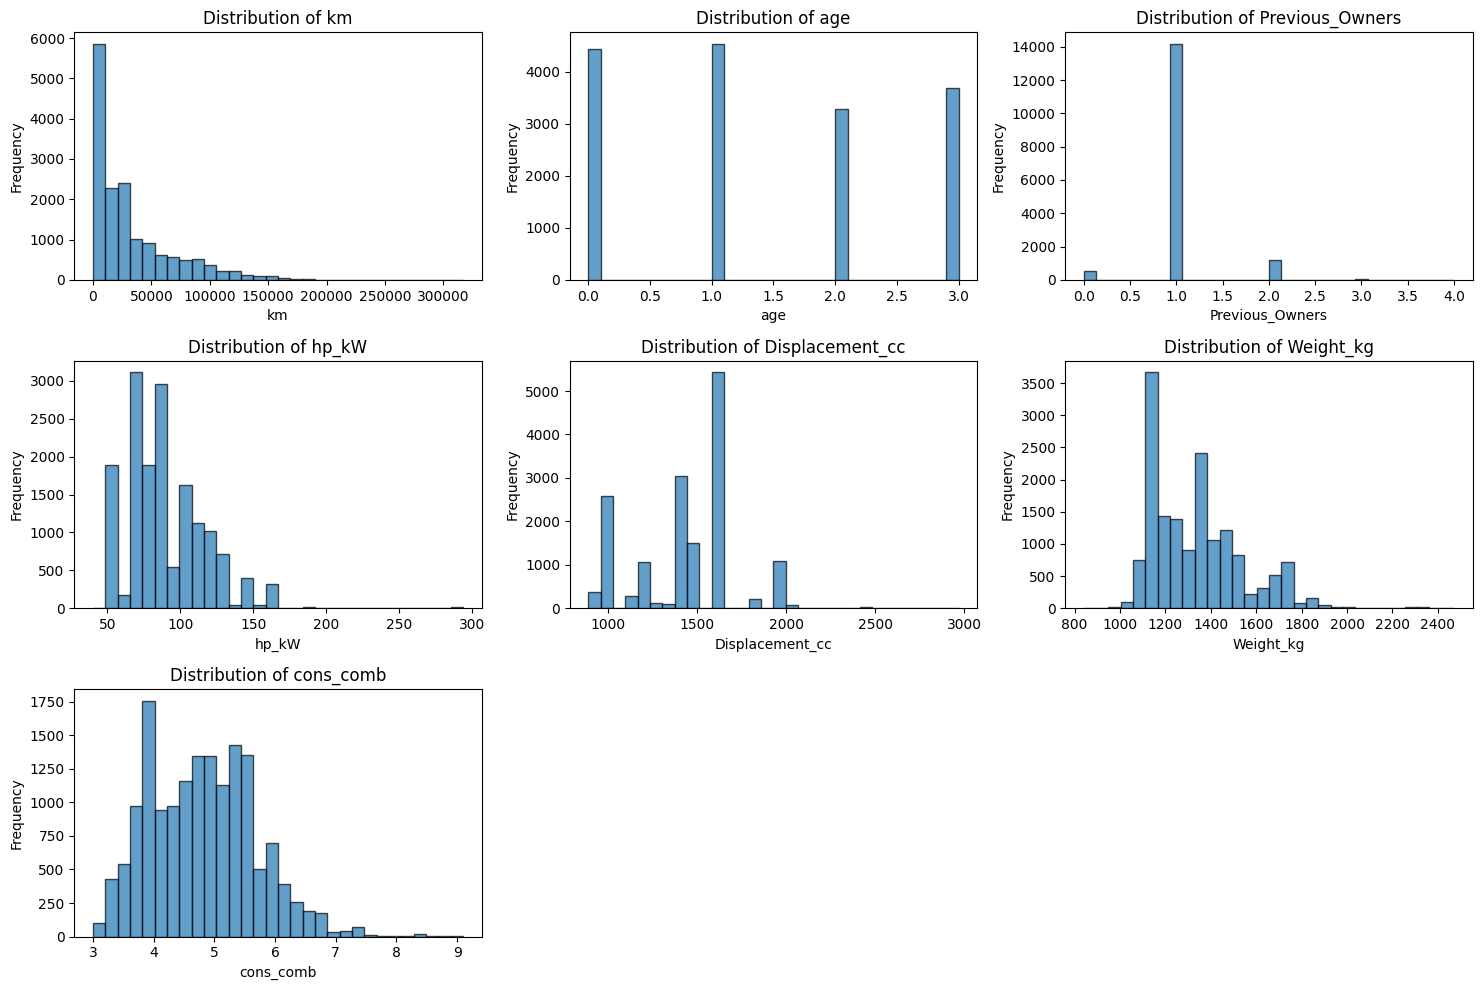

In [ ]:
# Identify numerical features and plot histograms
numerical_features = ['km', 'age', 'Previous_Owners', 'hp_kW', 'Displacement_cc', 'Weight_kg', 'cons_comb']
plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(3, 3, i)
    plt.hist(df[feature].dropna(), bins=30, edgecolor='black', alpha=0.7)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

#### **2.1.3** <font color =red> [3 marks] </font>
Identify categorical predictors and plot their frequency distributions.

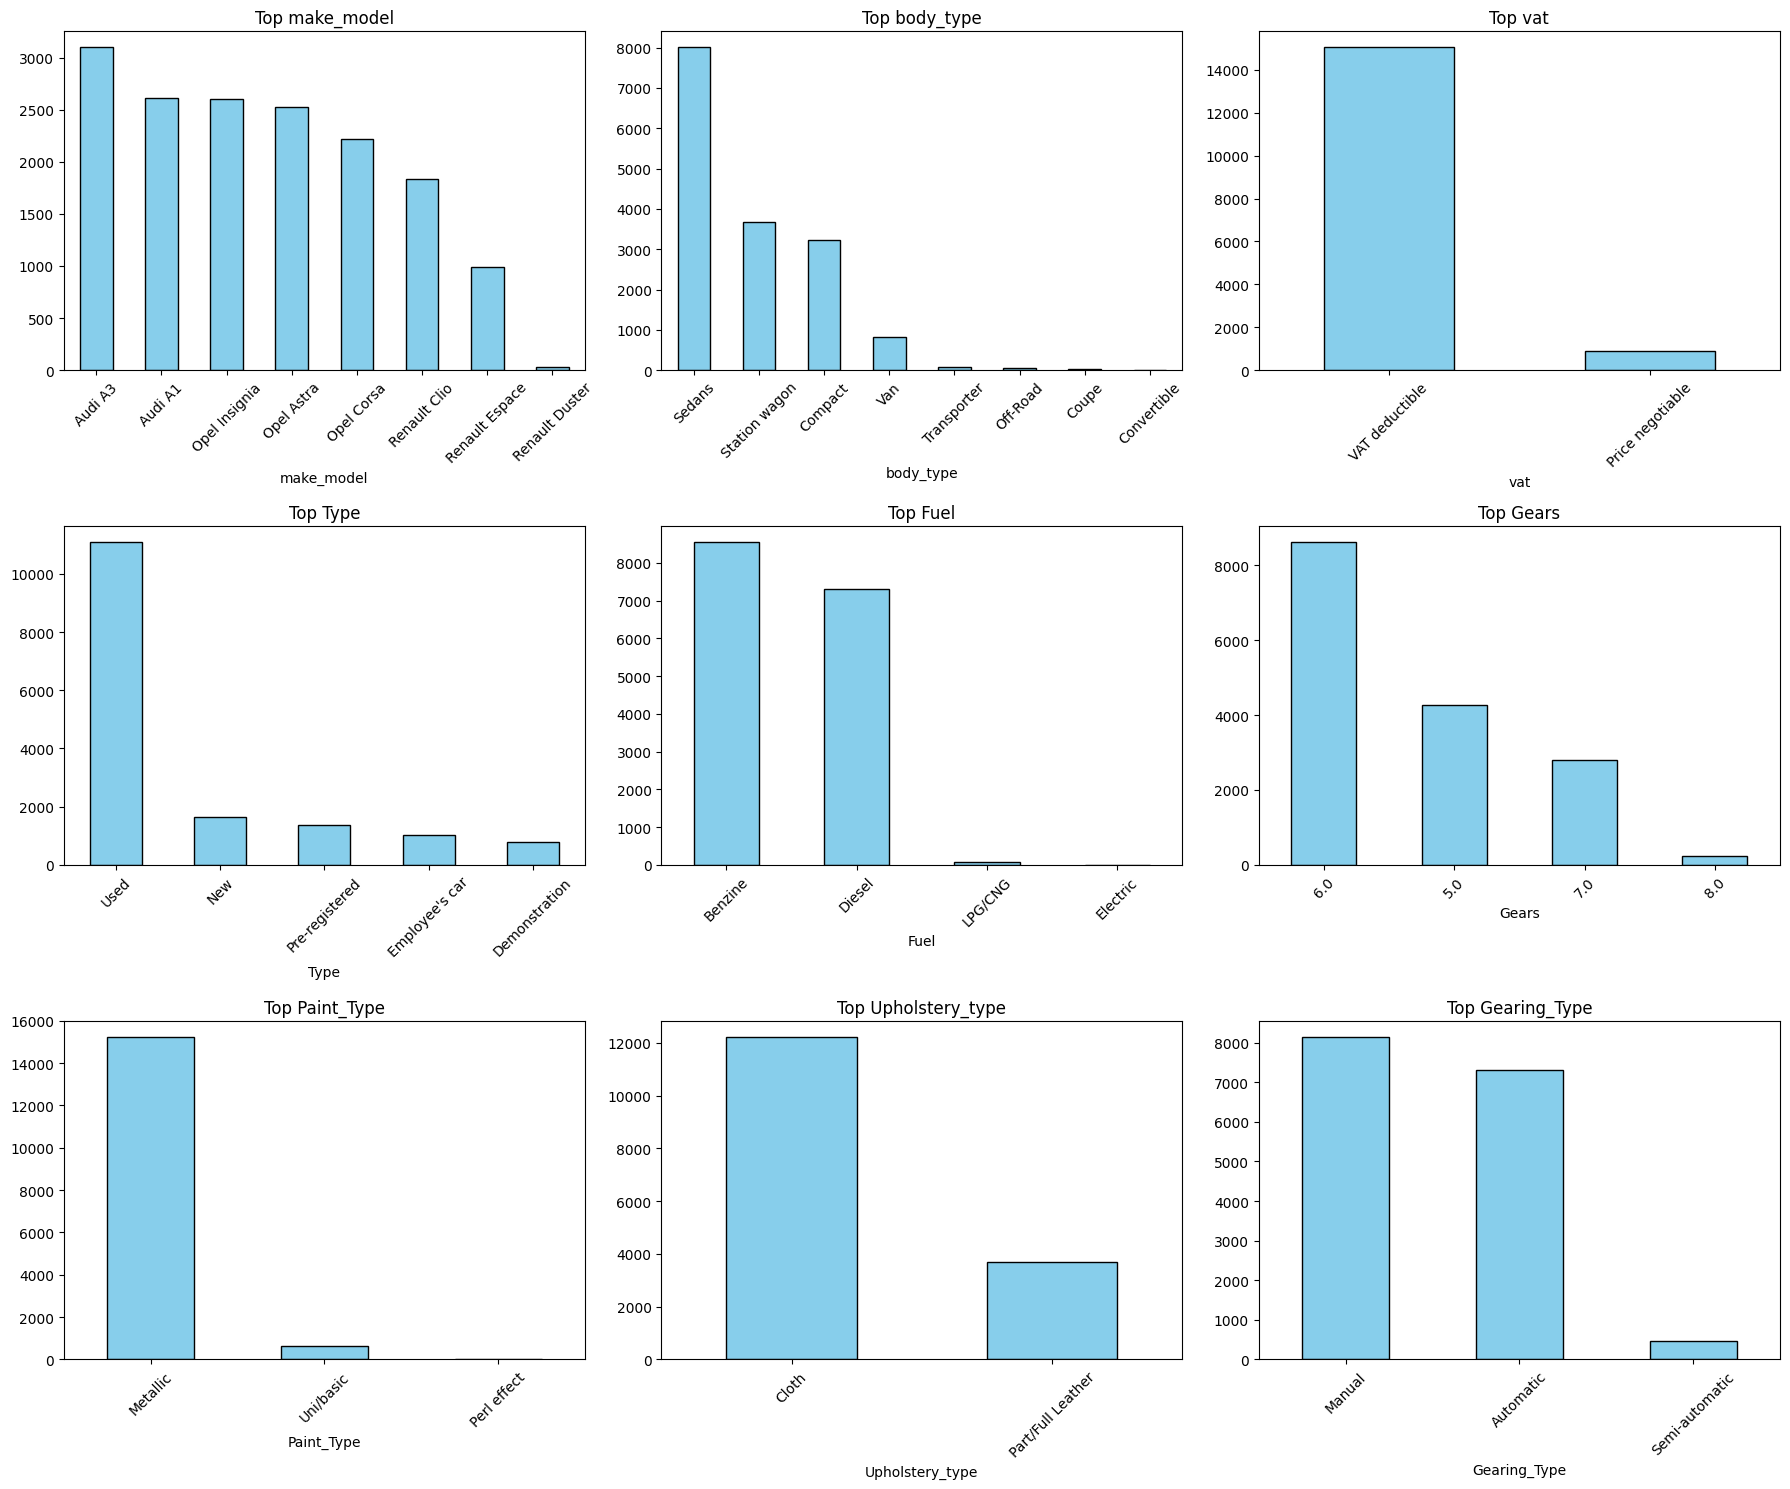

In [ ]:
# Identify categorical columns and check their frequency distributions
categorical_features = ['make_model', 'body_type', 'vat', 'Type', 'Fuel', 'Gears', 'Paint_Type', 'Upholstery_type', 'Gearing_Type', 'Drive_chain']

fig, axes = plt.subplots(3, 3, figsize=(18, 15))
axes = axes.ravel()
for i, feature in enumerate(categorical_features[:9]):
    top_categories = df[feature].value_counts().head(8)
    top_categories.plot(kind='bar', ax=axes[i], color='skyblue', edgecolor='black')
    axes[i].set_title(f'Top {feature}')
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

**Note**: Look carefully at the values stored in columns `["Comfort_Convenience", "Entertainment_Media", "Extras", "Safety_Security"]`.

Should they be considered categorical? Should they be dropped or handled any other way?

#### **2.1.4** <font color =red> [3 marks] </font>
Fix columns with low frequency values and class imbalances.

Some information regarding values in the `Type` column that may help:
- *'Pre-registered'* cars are ones which have already been registered previously by the seller.
- *'New'* cars are not necessarily new cars, but new-like cars. These might also have multiple owners due to multiple pre-registrations as well.
- *'Employee's car'* are cars used by employees over a short period of time and small distance.
- *'Demonstration'* cars are used for trial purposes and also driven for a short time and distance.

Based on these, you can handle this particular column. For other columns, decide a strategy on your own.

In [ ]:
# Fix columns as needed
type_mapping = {
    'Pre-registered': 'Used',
    "Employee's car": 'Used',
    'Demonstration': 'Used'
}
df['Type'] = df['Type'].replace(type_mapping)
for col in ['body_type', 'vat', 'Fuel', 'Gears', 'Paint_Type', 'Upholstery_type', 'Gearing_Type', 'Drive_chain']:
    counts = df[col].value_counts(normalize=True)
    rare_mask = counts < 0.01
    df[col] = df[col].where(~df[col].isin(counts[rare_mask].index), 'Other')

print("Fixed low frequency categories in categorical columns")
print(df['Type'].value_counts())

Fixed low frequency categories in categorical columns
Type
Used    14266
New      1649
Name: count, dtype: int64


#### **2.1.5** <font color =red> [3 marks] </font>
Identify target variable and plot the frequency distributions. Apply necessary transformations.

Text(0, 0.5, 'Frequency')

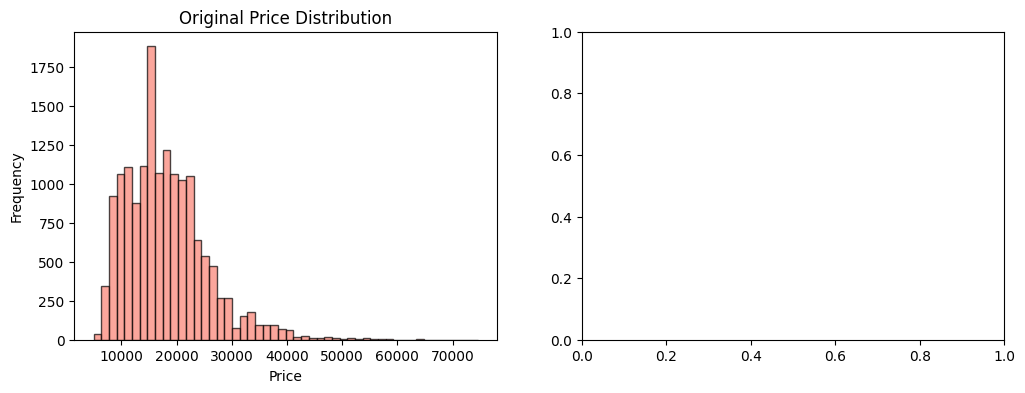

In [ ]:
# Plot histograms for target feature
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

axes[0].hist(df['price'], bins=50, edgecolor='black', alpha=0.7, color='salmon')
axes[0].set_title('Original Price Distribution')
axes[0].set_xlabel('Price')
axes[0].set_ylabel('Frequency')

**The target variable seems to be skewed. Perform suitable transformation on the target.**

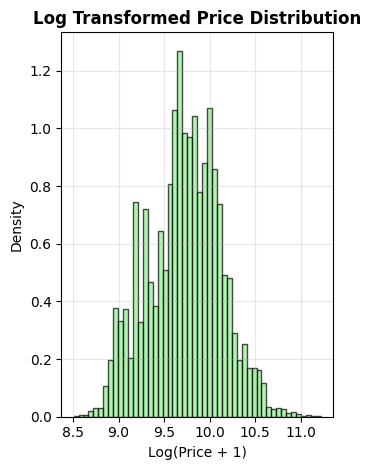

In [ ]:
# Transform the target feature
plt.subplot(1, 2, 2)
price_log = np.log1p(df['price'])
plt.hist(price_log, bins=50, edgecolor='black', alpha=0.7, color='lightgreen', density=True)
plt.title('Log Transformed Price Distribution', fontsize=12, fontweight='bold')
plt.xlabel('Log(Price + 1)')
plt.ylabel('Density')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()
df['log_price'] = np.log1p(df['price'])

### **2.2 Correlation analysis** <font color = red> [6 marks] </font>

#### **2.2.1** <font color =red> [3 marks] </font>
Plot the correlation map between features and target variable.

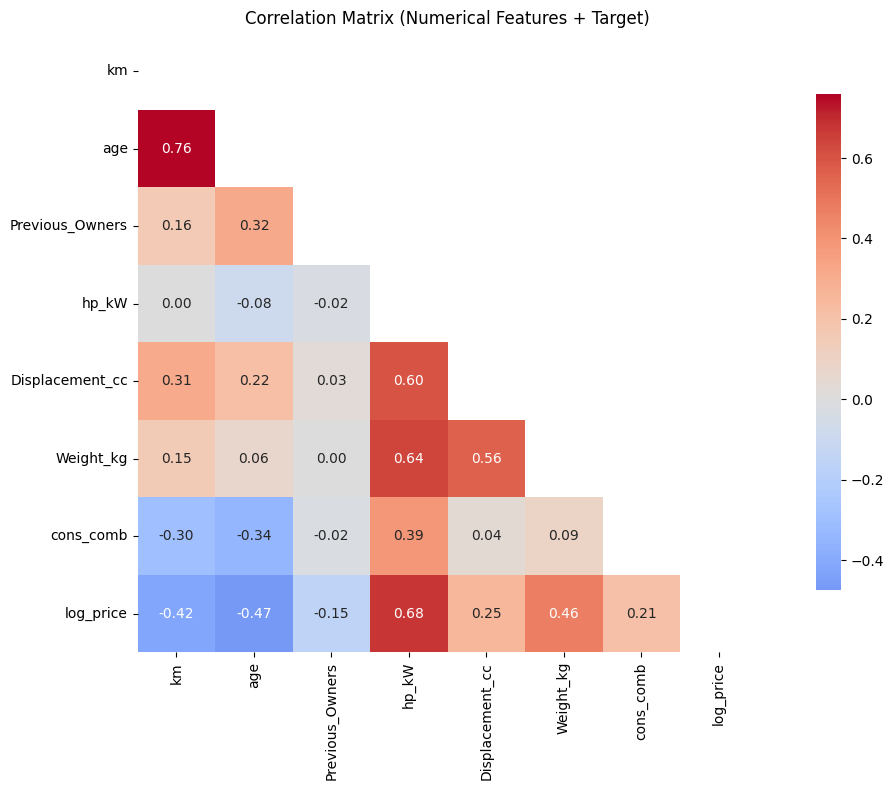

In [ ]:
# Visualise correlation
numericalAndTarget = numerical_features + ['log_price']
corr_matrix = df[numericalAndTarget].corr()

plt.figure(figsize=(12, 8))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='coolwarm', center=0,
            square=True, fmt='.2f', cbar_kws={"shrink": .8})
plt.title('Correlation Matrix (Numerical Features + Target)')
plt.tight_layout()
plt.show()

#### **2.2.2** <font color =red> [3 marks] </font>
Analyse correlation between categorical features and target variable.

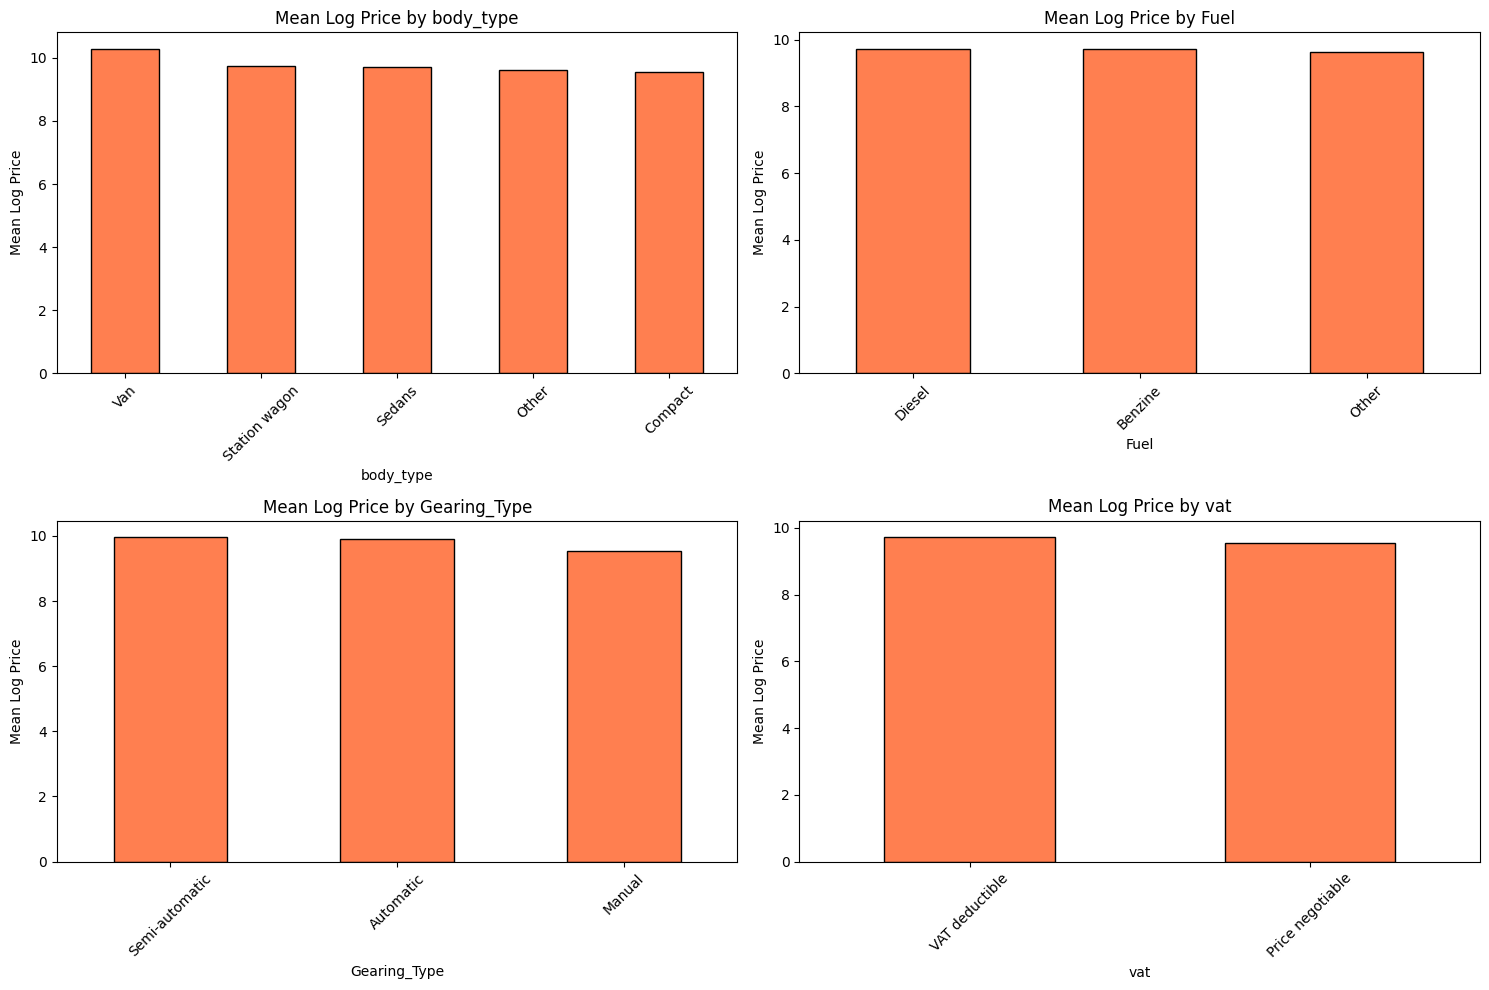

In [ ]:
# Comparing average values of target for different categories
categories = ['body_type', 'Fuel', 'Gearing_Type', 'vat']
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

for i, feature in enumerate(categories):
    row = i // 2
    col = i % 2
    cat_means = df.groupby(feature)['log_price'].mean().sort_values(ascending=False)
    cat_means.plot(kind='bar', ax=axes[row, col], color='coral', edgecolor='black')
    axes[row, col].set_title(f'Mean Log Price by {feature}')
    axes[row, col].tick_params(axis='x', rotation=45)
    axes[row, col].set_ylabel('Mean Log Price')

plt.tight_layout()
plt.show()

### **2.3 Outlier analysis** <font color = red> [5 marks] </font>

#### **2.3.1** <font color =red> [2 marks] </font>
Identify potential outliers in the data.

In [ ]:
# Outliers present in each column
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return len(outliers)

outlier_summary = {}
for col in numerical_features:
    outlier_count = detect_outliers_iqr(df, col)
    outlier_summary[col] = outlier_count
    print(f"{col}: {outlier_count} outliers ({outlier_count/len(df)*100:.1f}%)")

outlier_df = pd.DataFrame(list(outlier_summary.items()), columns=['Feature', 'Outliers'])
outlier_df['Outlier_%'] = (outlier_df['Outliers'] / len(df) * 100).round(2)
print("\nOutlier Summary:")
print(outlier_df.sort_values('Outliers', ascending=False))

km: 689 outliers (4.3%)
age: 0 outliers (0.0%)
Previous_Owners: 1757 outliers (11.0%)
hp_kW: 361 outliers (2.3%)
Displacement_cc: 21 outliers (0.1%)
Weight_kg: 87 outliers (0.5%)
cons_comb: 125 outliers (0.8%)

Outlier Summary:
           Feature  Outliers  Outlier_%
2  Previous_Owners      1757      11.04
0               km       689       4.33
3            hp_kW       361       2.27
6        cons_comb       125       0.79
5        Weight_kg        87       0.55
4  Displacement_cc        21       0.13
1              age         0       0.00


#### **2.3.2** <font color =red> [3 marks] </font>
Handle the outliers suitably.

In [ ]:
# Handle outliers
def cap_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = df[column].clip(lower_bound, upper_bound)
    return df

for col in numerical_features:
    df = cap_outliers(df, col)

print("Outliers capped using IQR method (1.5 * IQR)")

Outliers capped using IQR method (1.5 * IQR)


### **2.4 Feature Engineering** <font color = red> [11 marks] </font>

#### **2.4.1**
Fix any redundant columns and create new ones if needed.

In [ ]:
# Fix/create columns as needed
if 'make_model' in df.columns:
    df = df.drop('make_model', axis=1)
    print("Dropped 'make_model' due to high cardinality")
df['age_km_ratio'] = df['km'] / (df['age'] + 1)
numerical_features.append('age_km_ratio')
print("Created 'age_km_ratio' feature")
print(f"Final features shape: {df.shape}")

Dropped 'make_model' due to high cardinality
Created 'age_km_ratio' feature
Final features shape: (15915, 24)


#### **2.4.2** <font color =red> [4 marks] </font>
Analysis and feature engineering on `['Comfort_Convenience', 'Entertainment_Media', 'Extras', 'Safety_Security']`.

These columns contains lists of features present. Decide on how to include these features in the predictors.

In [ ]:
# Check unique values in each feature spec column
feature_spec_cols = ['Comfort_Convenience', 'Entertainment_Media', 'Extras', 'Safety_Security']
for col in feature_spec_cols:
    if col in df.columns:
        unique_count = df[col].nunique()
        print(f"{col}: {unique_count} are unique values")
        if unique_count < 20:
            print(f"Sample: {df[col].dropna().unique()[:5]}")
        print()

Comfort_Convenience: 6196 are unique values

Entertainment_Media: 346 are unique values

Extras: 659 are unique values

Safety_Security: 4442 are unique values



Out of these features, we will check the ones which are present in most of the cars or are absent from most of the cars. These kinds of features can be removed as they just increase the dimensionality without explaining the variance.

In [ ]:
# Drop features from df
feature_spec_cols = ['Comfort_Convenience', 'Entertainment_Media', 'Extras', 'Safety_Security']
cols_to_drop = [col for col in feature_spec_cols if col in df.columns]
df = df.drop(cols_to_drop, axis=1, errors='ignore')
print(f"Dropped feature spec columns: {cols_to_drop}")

Dropped feature spec columns: ['Comfort_Convenience', 'Entertainment_Media', 'Extras', 'Safety_Security']


#### **2.4.3** <font color =red> [3 marks] </font>
Perform feature encoding.

In [ ]:
# Encode features
catFeaturesToEncode = ['body_type', 'vat', 'Type', 'Fuel', 'Gears', 'Paint_Type',
                             'Upholstery_type', 'Gearing_Type', 'Drive_chain']

label_encoders = {}
for col in catFeaturesToEncode:
    if col in df.columns:
        le = LabelEncoder()
        df[col] = df[col].fillna('Missing').astype(str)
        df[col] = le.fit_transform(df[col])
        label_encoders[col] = le
print(f"Encoded columns: {list(label_encoders.keys())}")
df.head(15)

Encoded columns: ['body_type', 'vat', 'Type', 'Fuel', 'Gears', 'Paint_Type', 'Upholstery_type', 'Gearing_Type', 'Drive_chain']


,body_type,price,vat,km,Type,Fuel,Gears,age,Previous_Owners,hp_kW,Inspection_new,Paint_Type,Upholstery_type,Gearing_Type,Displacement_cc,Weight_kg,Drive_chain,cons_comb,log_price,age_km_ratio
0,2,15770,1,56013.0,1,1,2,3.0,1.0,66.0,1,0,0,0,1422.0,1220.0,2,3.8,9.665928,14003.250000
1,2,14500,0,80000.0,1,0,2,2.0,1.0,141.0,0,0,0,0,1798.0,1255.0,2,5.6,9.581973,26666.666667
2,2,14640,1,83450.0,1,1,2,3.0,1.0,85.0,0,0,0,0,1598.0,1135.0,2,3.8,9.591581,20862.500000
3,2,14500,1,73000.0,1,1,1,3.0,1.0,66.0,0,0,0,0,1422.0,1195.0,2,3.8,9.581973,18250.000000
4,2,16790,1,16200.0,1,1,2,3.0,1.0,66.0,1,0,0,0,1422.0,1135.0,2,4.1,9.728598,4050.000000
5,2,15090,1,63668.0,1,1,2,3.0,1.0,85.0,0,0,1,0,1598.0,1135.0,2,3.5,9.621854,15917.000000
6,3,16422,1,62111.0,1,1,2,3.0,1.0,85.0,1,0,1,0,1598.0,1195.0,2,3.7,9.706438,15527.750000
7,0,14480,1,14986.0,1,1,2,3.0,1.0,66.0,1,0,0,0,1422.0,1180.0,2,3.7,9.580593,3746.500000
8,2,16700,1,57000.0,1,1,2,3.0,1.0,85.0,0,0,0,0,1598.0,1275.0,2,3.7,9.723224,14250.000000
9,2,17990,1,16103.0,1,0,2,2.0,1.0,70.0,0,0,0,0,999.0,1135.0,2,4.2,9.797627,5367.666667


#### **2.4.4** <font color =red> [2 marks] </font>
Split the data into training and testing sets.

In [ ]:
# Split data
X = df.drop(['price', 'log_price'], axis=1)
y = df['log_price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

print(f"Training set: {X_train.shape}")
print(f"Test set: {X_test.shape}")
print(f"Target range - Train: {y_train.min():.2f} to {y_train.max():.2f}")
print(f"Target range - Test: {y_test.min():.2f} to {y_test.max():.2f}")

Training set: (12732, 18)
Test set: (3183, 18)
Target range - Train: 8.52 to 11.22
Target range - Test: 8.51 to 11.07


#### **2.4.5** <font color =red> [2 marks] </font>
Scale the features.

In [ ]:
# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"Scaler used = Standard Scaler \nShape of scaled X-train set -> {X_train_scaled.shape}")
print(f"Averages after scaling -> {np.mean(X_train_scaled, axis=0).round(3)}")

Scaler used = Standard Scaler 
Shape of scaled X-train set -> (12732, 18)
Averages after scaling -> [ 0. -0. -0.  0. -0. -0. -0.  0. -0. -0. -0. -0.  0.  0. -0.  0. -0. -0.]


## **3 Linear Regression Models** <font color =red> [35 marks] </font>


### **3.1 Baseline Linear Regression Model** <font color =red> [10 marks] </font>

#### **3.1.1** <font color =red> [5 marks] </font>
Build and fit a basic linear regression model. Perform evaluation using suitable metrics.

In [ ]:
# Initialise and train model
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

print(f"Number of features: {len(lr_model.coef_)}")

Number of features: 18


In [ ]:
# Evaluate the model's performance
y_train_pred_lr = lr_model.predict(X_train_scaled)
y_test_pred_lr = lr_model.predict(X_test_scaled)

maeLrTrain = mean_absolute_error(y_train, y_train_pred_lr)
maeLrTest = mean_absolute_error(y_test, y_test_pred_lr)
rmseLrTrain = np.sqrt(mean_squared_error(y_train, y_train_pred_lr))
rmseLrTest = np.sqrt(mean_squared_error(y_test, y_test_pred_lr))
r2LinearRegression = r2_score(y_test, y_test_pred_lr)

print(f"Train MAE: {maeLrTrain:.2f} \nTest MAE: {maeLrTest:.2f}")
print(f"Train RMSE: {rmseLrTrain:.2f} \nTest RMSE: {rmseLrTest:.2f}")
print(f"Test R²: {r2LinearRegression:.2f}")

Train MAE: 0.14 
Test MAE: 0.14
Train RMSE: 0.18 
Test RMSE: 0.18
Test R²: 0.81


#### **3.1.2** <font color =red> [5 marks] </font>
Analyse residuals and check other assumptions of linear regression.

Check for linearity by analysing residuals vs predicted values

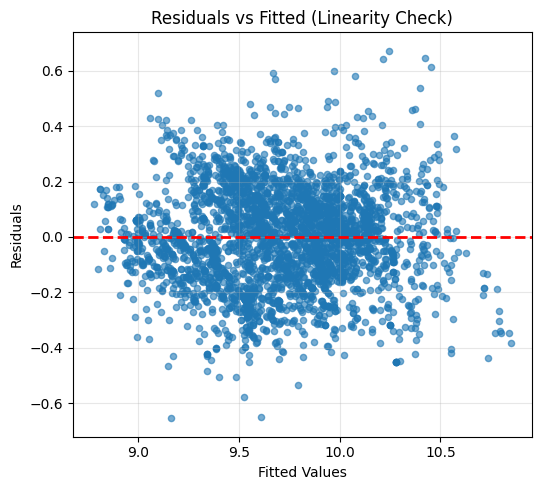

In [ ]:
# Linearity check: Plot residuals vs fitted values
residuals = y_test - y_test_pred_lr
fitted_lr = y_test_pred_lr

plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.scatter(fitted_lr, residuals, alpha=0.6, s=20)
plt.axhline(y=0, color='r', linestyle='--', linewidth=2)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted (Linearity Check)')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

Check normality in residual distribution

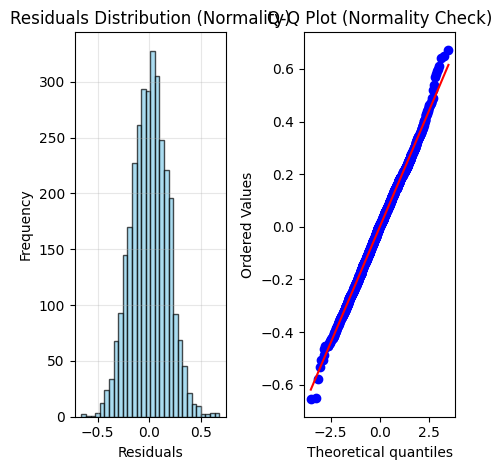

In [ ]:
# Check the normality of residuals by plotting their distribution
plt.subplot(1, 3, 2)
plt.hist(residuals, bins=30, edgecolor='black', alpha=0.7, color='skyblue')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Residuals Distribution (Normality)')
plt.grid(True, alpha=0.3)

plt.subplot(1, 3, 3)
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot (Normality Check)')

plt.tight_layout()
plt.show()

Check multicollinearity using Variance Inflation Factor (VIF) and handle features with high VIF.

In [ ]:
# Check for multicollinearity and handle
def calculate_vif(X):
    vif_data = pd.DataFrame()
    vif_data["feature"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif_data

vif_df = calculate_vif(X_train)
print("VIF Scores (Top 10 highest):")
print(vif_df.sort_values('VIF', ascending=False).head(10))
high_vif_features = []
features_to_drop = []
temp_X = X_train.copy()

while True:
    vif_temp = calculate_vif(temp_X)
    max_vif_feature = vif_temp.loc[vif_temp['VIF'].idxmax(), 'feature']
    if vif_temp['VIF'].max() > 10:
        high_vif_features.append(max_vif_feature)
        temp_X = temp_X.drop(max_vif_feature, axis=1)
        features_to_drop.append(max_vif_feature)
    else:break

print(f"\nDropped {len(features_to_drop)} high VIF features: {features_to_drop[:5]}")

VIF Scores (Top 10 highest):
            feature         VIF
7   Previous_Owners  258.812680
2                km   16.728016
17     age_km_ratio   11.649112
4              Fuel    4.463297
13  Displacement_cc    3.896579
6               age    3.886380
8             hp_kW    3.750191
16        cons_comb    2.675391
14        Weight_kg    2.511989
5             Gears    1.703925

Dropped 7 high VIF features: ['Previous_Owners', 'Displacement_cc', 'Weight_kg', 'cons_comb', 'Drive_chain']


### **3.2 Ridge Regression Implementation** <font color =red> [10 marks] </font>

#### **3.2.1** <font color =red> [2 marks] </font>
Define a list of random alpha values

In [ ]:
# List of alphas to tune for Ridge regularisation
alphaRidge = np.logspace(-3, 3, 50)
print(f"Coarse alpha range: {alphaRidge[0]:.4f} to {alphaRidge[-1]:.4f}")

Coarse alpha range: 0.0010 to 1000.0000


#### **3.2.2** <font color =red> [4 marks] </font>
Apply Ridge Regularisation and find the best value of alpha from the list

In [ ]:
# Applying Ridge regression
train_scores_ridge = []
test_scores_ridge = []

for alpha in alphaRidge:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train_scaled, y_train)
    train_pred = ridge.predict(X_train_scaled)
    test_pred = ridge.predict(X_test_scaled)
    train_scores_ridge.append(mean_absolute_error(y_train, train_pred))
    test_scores_ridge.append(mean_absolute_error(y_test, test_pred))
train_scores_ridge = np.array(train_scores_ridge)
test_scores_ridge = np.array(test_scores_ridge)

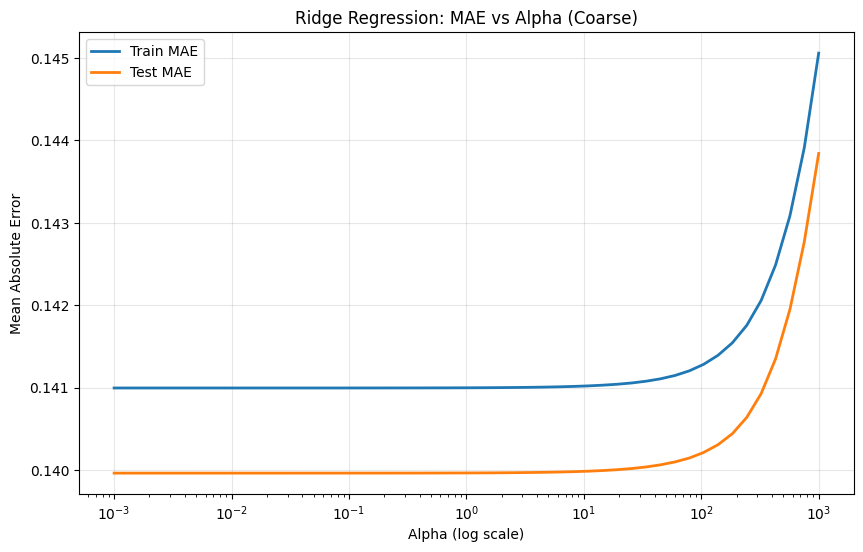

Best coarse alpha: 0.0010
Best coarse test MAE: 0.1400


In [ ]:
# Plot train and test scores against alpha
plt.figure(figsize=(10, 6))
plt.semilogx(alphaRidge, train_scores_ridge, label='Train MAE', linewidth=2)
plt.semilogx(alphaRidge, test_scores_ridge, label='Test MAE', linewidth=2)
plt.xlabel('Alpha (log scale)')
plt.ylabel('Mean Absolute Error')
plt.title('Ridge Regression: MAE vs Alpha (Coarse)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

bestIndexC = np.argmin(test_scores_ridge)
bestAlphaC = alphaRidge[bestIndexC]
print(f"Best coarse alpha: {bestAlphaC:.4f}")
print(f"Best coarse test MAE: {test_scores_ridge[bestIndexC]:.4f}")

Find the best alpha value.

In [ ]:
# Best alpha value
best_alpha_ridge_coarse = alphaRidge[np.argmin(test_scores_ridge)]
print(f"Best alpha (coarse): {best_alpha_ridge_coarse:.4f}")

# Best score (negative MAE)
best_score_ridge_coarse = test_scores_ridge[np.argmin(test_scores_ridge)]
print(f"Best test MAE (coarse): {best_score_ridge_coarse:.2f}")

Best alpha (coarse): 0.0010
Best test MAE (coarse): 0.14


We will get some best value of alpha above. This however is not the most accurate value but the best value from the given list. Now we have a rough estimate of the range that best alpha falls in. Let us do another iteration over the values in a smaller range.

#### **3.2.3** <font color =red> [4 marks] </font>
Fine tune by taking a closer range of alpha based on the previous result.

In [ ]:
# Take a smaller range of alpha to test
fineTuneAlphaValue = np.linspace(best_alpha_ridge_coarse * 0.1,
                               best_alpha_ridge_coarse * 10, 50)
print(f"Fine alpha range: {fineTuneAlphaValue[0]:.4f} to {fineTuneAlphaValue[-1]:.4f}")

Fine alpha range: 0.0001 to 0.0100


In [ ]:
# Applying Ridge regression
train_scores_ridge_fine = []
test_scores_ridge_fine = []

for alpha in fineTuneAlphaValue:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train_scaled, y_train)
    train_scores_ridge_fine.append(mean_absolute_error(y_train, ridge.predict(X_train_scaled)))
    test_scores_ridge_fine.append(mean_absolute_error(y_test, ridge.predict(X_test_scaled)))

Plot the error-alpha graph again and find the actual optimal value for alpha.

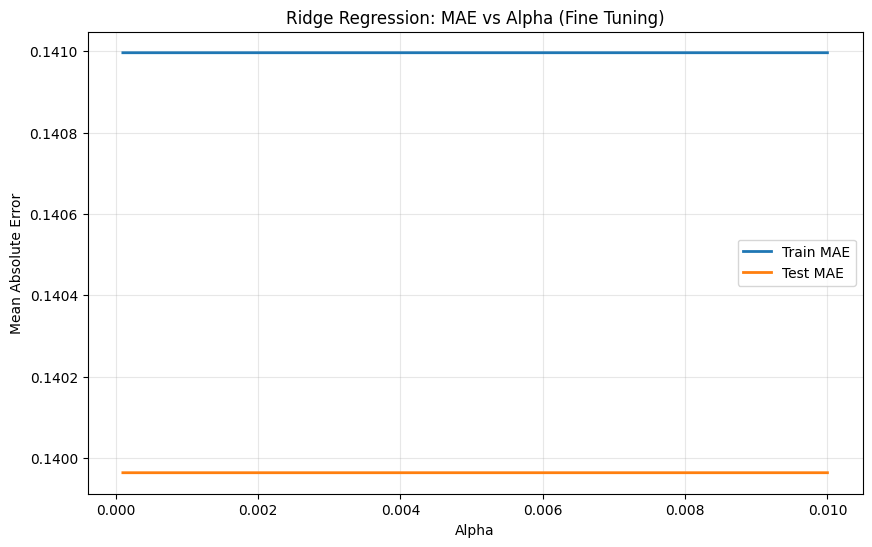

Best alpha (fine): 0.000100
Best test MAE (fine): 0.139964


In [ ]:
# Plot train and test scores against alpha
plt.figure(figsize=(10, 6))
plt.plot(fineTuneAlphaValue, train_scores_ridge_fine, label='Train MAE', linewidth=2)
plt.plot(fineTuneAlphaValue, test_scores_ridge_fine, label='Test MAE', linewidth=2)
plt.xlabel('Alpha')
plt.ylabel('Mean Absolute Error')
plt.title('Ridge Regression: MAE vs Alpha (Fine Tuning)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

best_idx_fine = np.argmin(test_scores_ridge_fine)

# Best alpha value
best_alpha_ridge = fineTuneAlphaValue[best_idx_fine]
print(f"Best alpha (fine): {best_alpha_ridge:.6f}")

# Best score (negative MAE)
best_test_mae_ridge = test_scores_ridge_fine[best_idx_fine]
print(f"Best test MAE (fine): {best_test_mae_ridge:.6f}")


In [ ]:
# Set best alpha for Ridge regression
# Fit the Ridge model to get the coefficients of the fitted model
ridge_final = Ridge(alpha=best_alpha_ridge)
ridge_final.fit(X_train_scaled, y_train)

Ridge(alpha=np.float64(0.0001))

In [ ]:
# Show the coefficients for each feature
ridge_coef_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Ridge_Coefficient': ridge_final.coef_
}).sort_values('Ridge_Coefficient', key=abs, ascending=False)

print("Top 10 Ridge Coefficients:")
print(ridge_coef_df.head(10).round(4))

Top 10 Ridge Coefficients:
            Feature  Ridge_Coefficient
8             hp_kW             0.2433
5             Gears             0.1140
6               age            -0.1000
13  Displacement_cc            -0.0861
2                km            -0.0638
4              Fuel             0.0528
16        cons_comb            -0.0505
17     age_km_ratio            -0.0422
14        Weight_kg             0.0379
11  Upholstery_type             0.0208


In [ ]:
# Evaluate the Ridge model on the test data
y_pred_ridge_test = ridge_final.predict(X_test_scaled)
ridge_test_mae = mean_absolute_error(y_test, y_pred_ridge_test)
ridge_test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_ridge_test))
ridge_test_r2 = r2_score(y_test, y_pred_ridge_test)

print(f"Ridge Final Model Performance:")
print(f"Test MAE: {ridge_test_mae:.4f}")
print(f"Test RMSE: {ridge_test_rmse:.4f}")
print(f"Test R²: {ridge_test_r2:.4f}")

Ridge Final Model Performance:
Test MAE: 0.1400
Test RMSE: 0.1753
Test R²: 0.8078


### **3.3 Lasso Regression Implementation** <font color =red> [10 marks] </font>

#### **3.3.1** <font color =red> [2 marks] </font>
Define a list of random alpha values

In [ ]:
# List of alphas to tune for Lasso regularisation
alphas_lasso_coarse = np.logspace(-4, 1, 50)
print(f"Lasso coarse alpha range: {alphas_lasso_coarse[0]:.6f} to {alphas_lasso_coarse[-1]:.4f}")

Lasso coarse alpha range: 0.000100 to 10.0000


#### **3.3.2** <font color =red> [4 marks] </font>
Apply Ridge Regularisation and find the best value of alpha from the list

In [ ]:
# Initialise Lasso regression model
train_scores_lasso_coarse = []
test_scores_lasso_coarse = []

for alpha in alphas_lasso_coarse:
    lasso = Lasso(alpha=alpha, max_iter=5000, random_state=42)
    lasso.fit(X_train_scaled, y_train)
    train_scores_lasso_coarse.append(mean_absolute_error(y_train, lasso.predict(X_train_scaled)))
    test_scores_lasso_coarse.append(mean_absolute_error(y_test, lasso.predict(X_test_scaled)))

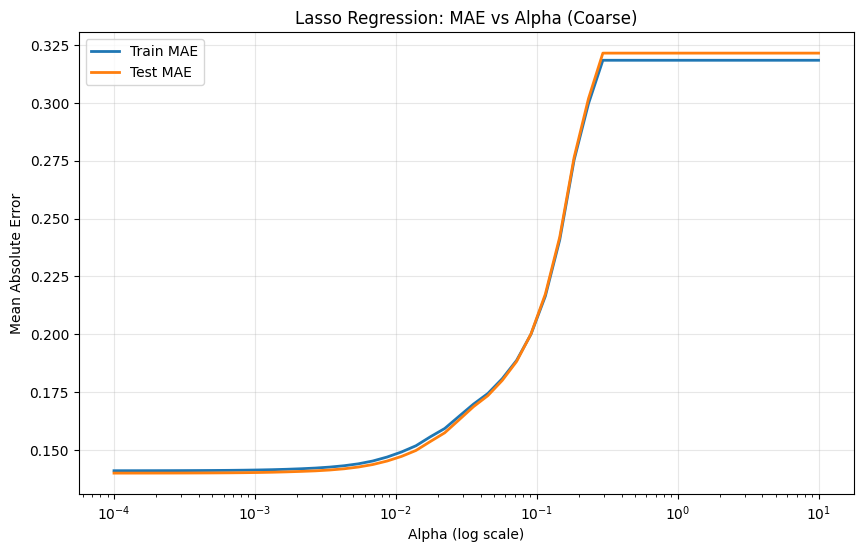

In [ ]:
# Plot train and test scores against alpha
plt.figure(figsize=(10, 6))
plt.semilogx(alphas_lasso_coarse, train_scores_lasso_coarse, label='Train MAE', linewidth=2)
plt.semilogx(alphas_lasso_coarse, test_scores_lasso_coarse, label='Test MAE', linewidth=2)
plt.xlabel('Alpha (log scale)')
plt.ylabel('Mean Absolute Error')
plt.title('Lasso Regression: MAE vs Alpha (Coarse)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

In [ ]:
# Best alpha value
best_alpha_lasso_coarse = alphas_lasso_coarse[np.argmin(test_scores_lasso_coarse)]
print(f"Best alpha (coarse): {best_alpha_lasso_coarse:.6f}")

# Best score (negative MAE)
best_score_lasso_coarse = test_scores_lasso_coarse[np.argmin(test_scores_lasso_coarse)]
print(f"Best test MAE (coarse): {best_score_lasso_coarse:.6f}")

Best alpha (coarse): 0.000100
Best test MAE (coarse): 0.139981


#### **3.3.3** <font color =red> [4 marks] </font>
Fine tune by taking a closer range of alpha based on the previous result.

In [ ]:
# List of alphas to tune for Lasso regularization
alphas_lasso_fine = np.linspace(best_alpha_lasso_coarse * 0.5,
                               best_alpha_lasso_coarse * 2, 50)
print(f"Lasso fine alpha range: {alphas_lasso_fine[0]:.6f} to {alphas_lasso_fine[-1]:.6f}")

Lasso fine alpha range: 0.000050 to 0.000200


In [ ]:
# Tuning Lasso hyperparameters
train_scores_lasso_fine = []
test_scores_lasso_fine = []

for alpha in alphas_lasso_fine:
    lasso = Lasso(alpha=alpha, max_iter=5000, random_state=42)
    lasso.fit(X_train_scaled, y_train)
    train_scores_lasso_fine.append(mean_absolute_error(y_train, lasso.predict(X_train_scaled)))
    test_scores_lasso_fine.append(mean_absolute_error(y_test, lasso.predict(X_test_scaled)))

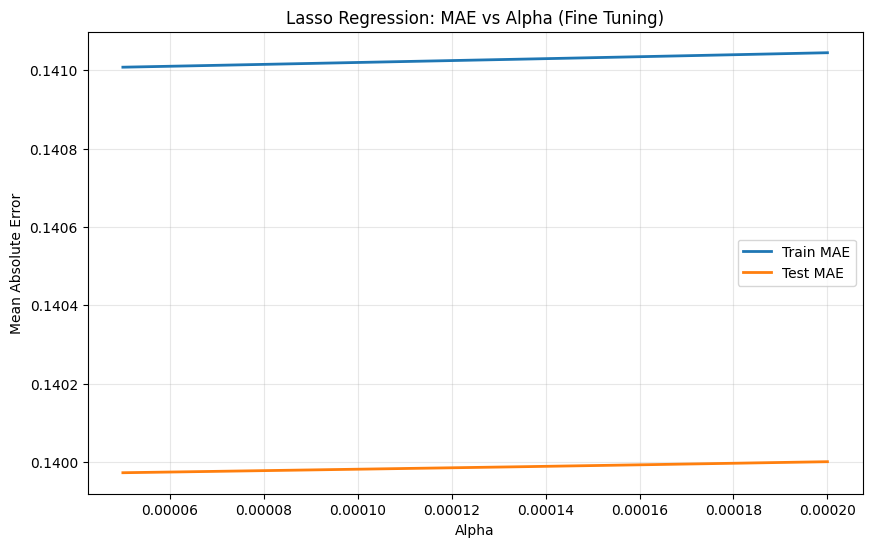

In [ ]:
# Plot train and test scores against alpha
plt.figure(figsize=(10, 6))
plt.plot(alphas_lasso_fine, train_scores_lasso_fine, label='Train MAE', linewidth=2)
plt.plot(alphas_lasso_fine, test_scores_lasso_fine, label='Test MAE', linewidth=2)
plt.xlabel('Alpha')
plt.ylabel('Mean Absolute Error')
plt.title('Lasso Regression: MAE vs Alpha (Fine Tuning)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()


In [ ]:
# Best alpha value
best_alpha_lasso_final = alphas_lasso_fine[np.argmin(test_scores_lasso_fine)]
print(f"Best alpha (fine): {best_alpha_lasso_final:.6f}")

# Best score (negative MAE)
best_score_lasso_final = test_scores_lasso_fine[np.argmin(test_scores_lasso_fine)]
print(f"Best test MAE (fine): {best_score_lasso_final:.6f}")

Best alpha (fine): 0.000050
Best test MAE (fine): 0.139972


In [ ]:
# Set best alpha for Lasso regression
lasso_final = Lasso(alpha=best_alpha_lasso_final, max_iter=5000, random_state=42)
lasso_final.fit(X_train_scaled, y_train)

# Fit the Lasso model on scaled training data
# Get the coefficients of the fitted model
print("Final Lasso model fitted")
print(f"Number of non-zero coefficients: {(lasso_final.coef_ != 0).sum()}")

Final Lasso model fitted
Number of non-zero coefficients: 17


In [ ]:
# Check the coefficients for each feature
lasso_coef_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Lasso_Coefficient': lasso_final.coef_
}).sort_values('Lasso_Coefficient', key=abs, ascending=False)

print("Top 10 Lasso Coefficients:")
print(lasso_coef_df.head(10).round(4))
print(f"\nZero coefficients: {(lasso_final.coef_ == 0).sum()} ({(lasso_final.coef_ == 0).sum()/len(lasso_final.coef_)*100:.1f}%)")

Top 10 Lasso Coefficients:
            Feature  Lasso_Coefficient
8             hp_kW             0.2430
5             Gears             0.1140
6               age            -0.1000
13  Displacement_cc            -0.0858
2                km            -0.0637
4              Fuel             0.0525
16        cons_comb            -0.0505
17     age_km_ratio            -0.0421
14        Weight_kg             0.0378
11  Upholstery_type             0.0207

Zero coefficients: 1 (5.6%)


In [ ]:
# Evaluate the Lasso model on the test data
y_pred_lasso_test = lasso_final.predict(X_test_scaled)
lasso_test_mae = mean_absolute_error(y_test, y_pred_lasso_test)
lasso_test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_lasso_test))
lasso_test_r2 = r2_score(y_test, y_pred_lasso_test)

print(f"Lasso Final Model Performance:")
print(f"Test MAE: {lasso_test_mae:.4f}")
print(f"Test RMSE: {lasso_test_rmse:.4f}")
print(f"Test R²: {lasso_test_r2:.4f}")

Lasso Final Model Performance:
Test MAE: 0.1400
Test RMSE: 0.1753
Test R²: 0.8078


### **3.4 Regularisation Comparison & Analysis** <font color =red> [5 marks] </font>

#### **3.4.1** <font color =red> [2 marks] </font>
Compare the evaluation metrics for each model.

In [ ]:
# Compare metrics for each model
metrics_df = pd.DataFrame({
    'Model': ['Linear Regression', 'Ridge Regression', 'Lasso Regression'],
    'Test_MAE': [maeLrTest, ridge_test_mae, lasso_test_mae],
    'Test_RMSE': [rmseLrTest, ridge_test_rmse, lasso_test_rmse],
    'Test_R2': [r2LinearRegression, ridge_test_r2, lasso_test_r2]
}).round(4)

print("Model Performance Comparison:")
print(metrics_df.to_string(index=False))

Model Performance Comparison:
            Model  Test_MAE  Test_RMSE  Test_R2
Linear Regression      0.14     0.1753   0.8078
 Ridge Regression      0.14     0.1753   0.8078
 Lasso Regression      0.14     0.1753   0.8078


#### **3.4.2** <font color =red> [3 marks] </font>
Compare the coefficients for the three models.

Also visualise a few of the largest coefficients and the coefficients of features dropped by Lasso.

In [ ]:
# Compare highest coefficients and coefficients of eliminated features
coef_comparison = pd.DataFrame({
    'Feature': X_train.columns,
    'LinearRegression': lr_model.coef_,
    'Ridge': ridge_final.coef_,
    'Lasso': lasso_final.coef_
})

# Top 15 absolute coefficients across all models
top_features = coef_comparison[['Ridge', 'Lasso']].abs().max(axis=1).nlargest(15).index
top_coef_comparison = coef_comparison.loc[top_features].round(4)
print("Top 15 Coefficients Comparison:")
print(top_coef_comparison.to_string())

# Lasso eliminated features
lasso_eliminated = coef_comparison[coef_comparison['Lasso'] == 0]['Feature'].tolist()
print(f"\nFeatures eliminated by Lasso ({len(lasso_eliminated)} features):")
print(lasso_eliminated[:10], "..." if len(lasso_eliminated) > 10 else "")

Top 15 Coefficients Comparison:
            Feature  LinearRegression   Ridge   Lasso
8             hp_kW            0.2433  0.2433  0.2430
5             Gears            0.1140  0.1140  0.1140
6               age           -0.1000 -0.1000 -0.1000
13  Displacement_cc           -0.0861 -0.0861 -0.0858
2                km           -0.0638 -0.0638 -0.0637
4              Fuel            0.0528  0.0528  0.0525
16        cons_comb           -0.0505 -0.0505 -0.0505
17     age_km_ratio           -0.0422 -0.0422 -0.0421
14        Weight_kg            0.0379  0.0379  0.0378
11  Upholstery_type            0.0208  0.0208  0.0207
9    Inspection_new            0.0083  0.0083  0.0082
3              Type           -0.0066 -0.0066 -0.0066
0         body_type           -0.0060 -0.0060 -0.0059
15      Drive_chain            0.0022  0.0022  0.0022
10       Paint_Type           -0.0018 -0.0018 -0.0017

Features eliminated by Lasso (1 features):
['Previous_Owners'] 


## **4 Conclusion & Key Takeaways**  <font color =red> [10 marks] </font>

What did you notice by performing regularisation? Did the model performance improve? If not, then why? Did you find overfitting or not? Was the data sufficent? Is a linear model sufficient?

#### **4.1 Conclude with outcomes and insights gained** <font color =red> [10 marks] </font>